In [32]:
from helpers import (Applicant,
                     apply_function, 
                     job_scraper)
import pandas as pd

In [22]:
# Create a list of jobs we're interested in applying for
titles_to_scrape = ['data analyst', 'data engineer', 'analytics engineer']

url = 'https://www.harnham.com/job-search/?_keyword={keyword}&_location=united-states&_paged={num}'

In [27]:
# Scrape the job board for results from those job titles
job_data = job_scraper.job_scraper(titles_to_scrape,url)

Extracting data for data analyst page 1
Extracting data for data analyst page 2
Extracting data for data analyst page 3
Extracting data for data analyst page 4
Extracting data for data analyst page 5
Extracting data for data analyst page 6
Extracting data for data engineer page 1
Extracting data for data engineer page 2
Extracting data for data engineer page 3
Extracting data for data engineer page 4
Extracting data for data engineer page 5
Extracting data for data engineer page 6
Extracting data for data engineer page 7
Extracting data for analytics engineer page 1
Extracting data for analytics engineer page 2
Extracting data for analytics engineer page 3
Extracting data for analytics engineer page 4
Extracting data for analytics engineer page 5
Extracting data for analytics engineer page 6
Extracting data for analytics engineer page 7


In [29]:
# Put job board scrape into a DataFrame so we can do analysis and apply to jobs
df = pd.DataFrame(job_data, columns=['Job Title','Pay Range','Link'])
df = df.drop_duplicates()
df.head()

,Job Title,Pay Range,Link
0,Data Analyst,$110000 - $140000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...
1,Senior Data Analyst,$100000 - $115000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...
2,Head of Analytics,$225000 - $250000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...
3,"Senior Analyst, Business Analytics",$100000 - $115000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...
4,Director of Audience Strategy,$140000 - $155000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...


In [31]:
# Create the Applicant object we'll use to submit job applications for
dunder = Applicant('Michael Scott','michaelscott@dundermifflin','5558675309')

In [34]:
# Make a list of all the jobs we've applied for
applied_jobs = []

In [ ]:
# Apply to all the jobs links in the DataFrame using our Applicant's information
for index, row in df[::-1].iterrows():
    link = row['Link']
    if link not in applied_jobs:
        applied_jobs.append(link)
        await apply_function.apply_to_job(link,dunder)

In [43]:
# Create new high and low bands from pay range
df['Low_Band'] = df['Pay Range'].str.split(' - ').str[0].str.replace('$', '')
df['High_Band']  = df['Pay Range'].str.split(' - ').str[1].str.replace('$', '')
df.head()

,Job Title,Pay Range,Link,Low_Band,High_Band
0,Data Analyst,$110000 - $140000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...,110000,140000
1,Senior Data Analyst,$100000 - $115000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...,100000,115000
2,Head of Analytics,$225000 - $250000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...,225000,250000
3,"Senior Analyst, Business Analytics",$100000 - $115000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...,100000,115000
4,Director of Audience Strategy,$140000 - $155000,https://www.harnham.com/job/eb8cdd1a-d1d1-4f13...,140000,155000


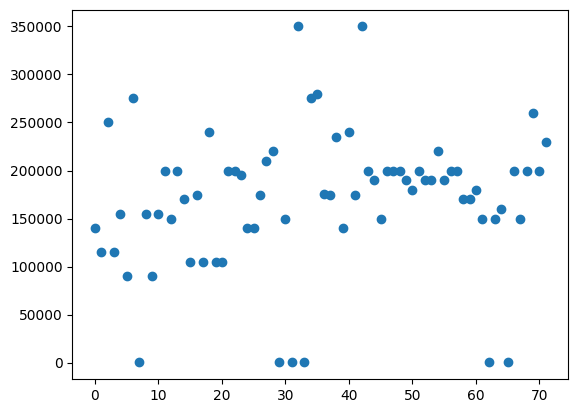

In [50]:
import matplotlib.pyplot as plt

x = range(len(df))


plt.scatter(x,df['High_Band'].astype(int))
plt.show()